# SVM Kernel practical explanation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [7]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [4]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1]) #combines positive and negative y1 values to get both top and bottom  halves  if the circle
x1=np.hstack([x1,-x1])

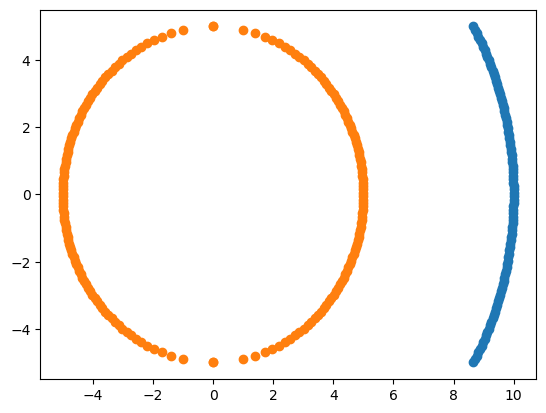

In [5]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [8]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [9]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df2['Y']=1
df=pd.concat([df1,df2],ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [10]:
df.tail()

,X1,X2,Y
395,-8.881281,-4.59596,1
396,-8.828277,-4.69697,1
397,-8.773790,-4.79798,1
398,-8.717792,-4.89899,1
399,-8.660254,-5.00000,1


In [12]:
#independent and dependent features
x=df.iloc[:,:2]
y=df.Y

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [15]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [16]:
y_train

57     0
87     0
357    1
355    1
238    1
      ..
369    1
320    1
15     0
125    0
265    1
Name: Y, Length: 300, dtype: int64

# Polynomial Kernel

In [17]:
# We need to find componets for the polynomial kernel

In [18]:
#X1,X2,X_squares,X2_square ,X1*X2
df['X1_Square']=df['X1']**2
df['X2_Square']=df['X2']**2
df['X1*X2']=(df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [19]:
#Independent and dependent features
x=df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y=df['Y']

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

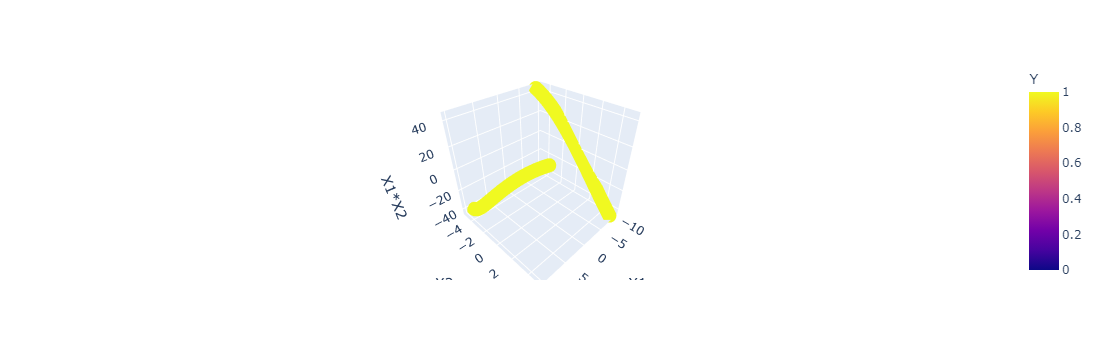

In [28]:
import plotly.express as px
fig=px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

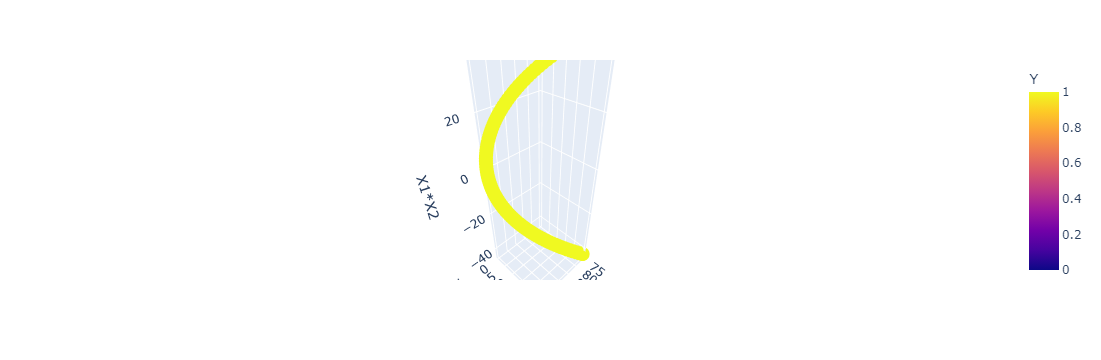

In [27]:
fig=px.scatter_3d(df,x='X1_Square',y='X2_Square',z='X1*X2',color='Y')
fig.show()